In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [2]:
df = pd.read_csv('/home/vikrant/D:/Project/Phishing_detection/phishing.csv')
df

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
df.drop(labels = 'Index', axis = 1, inplace = True)

In [4]:
df.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.groupby(['class']).count()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
class,,,,,,,,,,,,,,,,,,,,,
-1,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,...,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897
1,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,...,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157


In [6]:
df['class'].value_counts()

 1    6157
-1    4897
Name: class, dtype: int64

[Text(0, 0, 'Phishing Site'), Text(0, 0, 'Normal Site')]

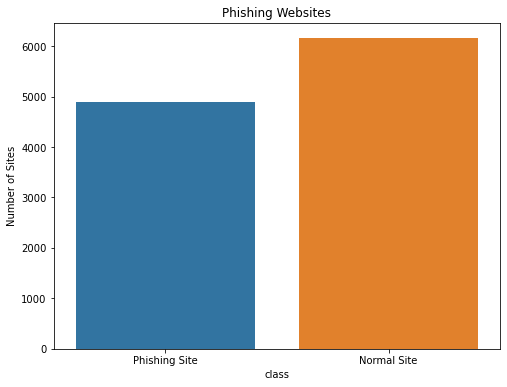

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['class'])
plt.title('Phishing Websites')
plt.ylabel('Number of Sites')
ax.set_xticklabels(['Phishing Site', 'Normal Site'])

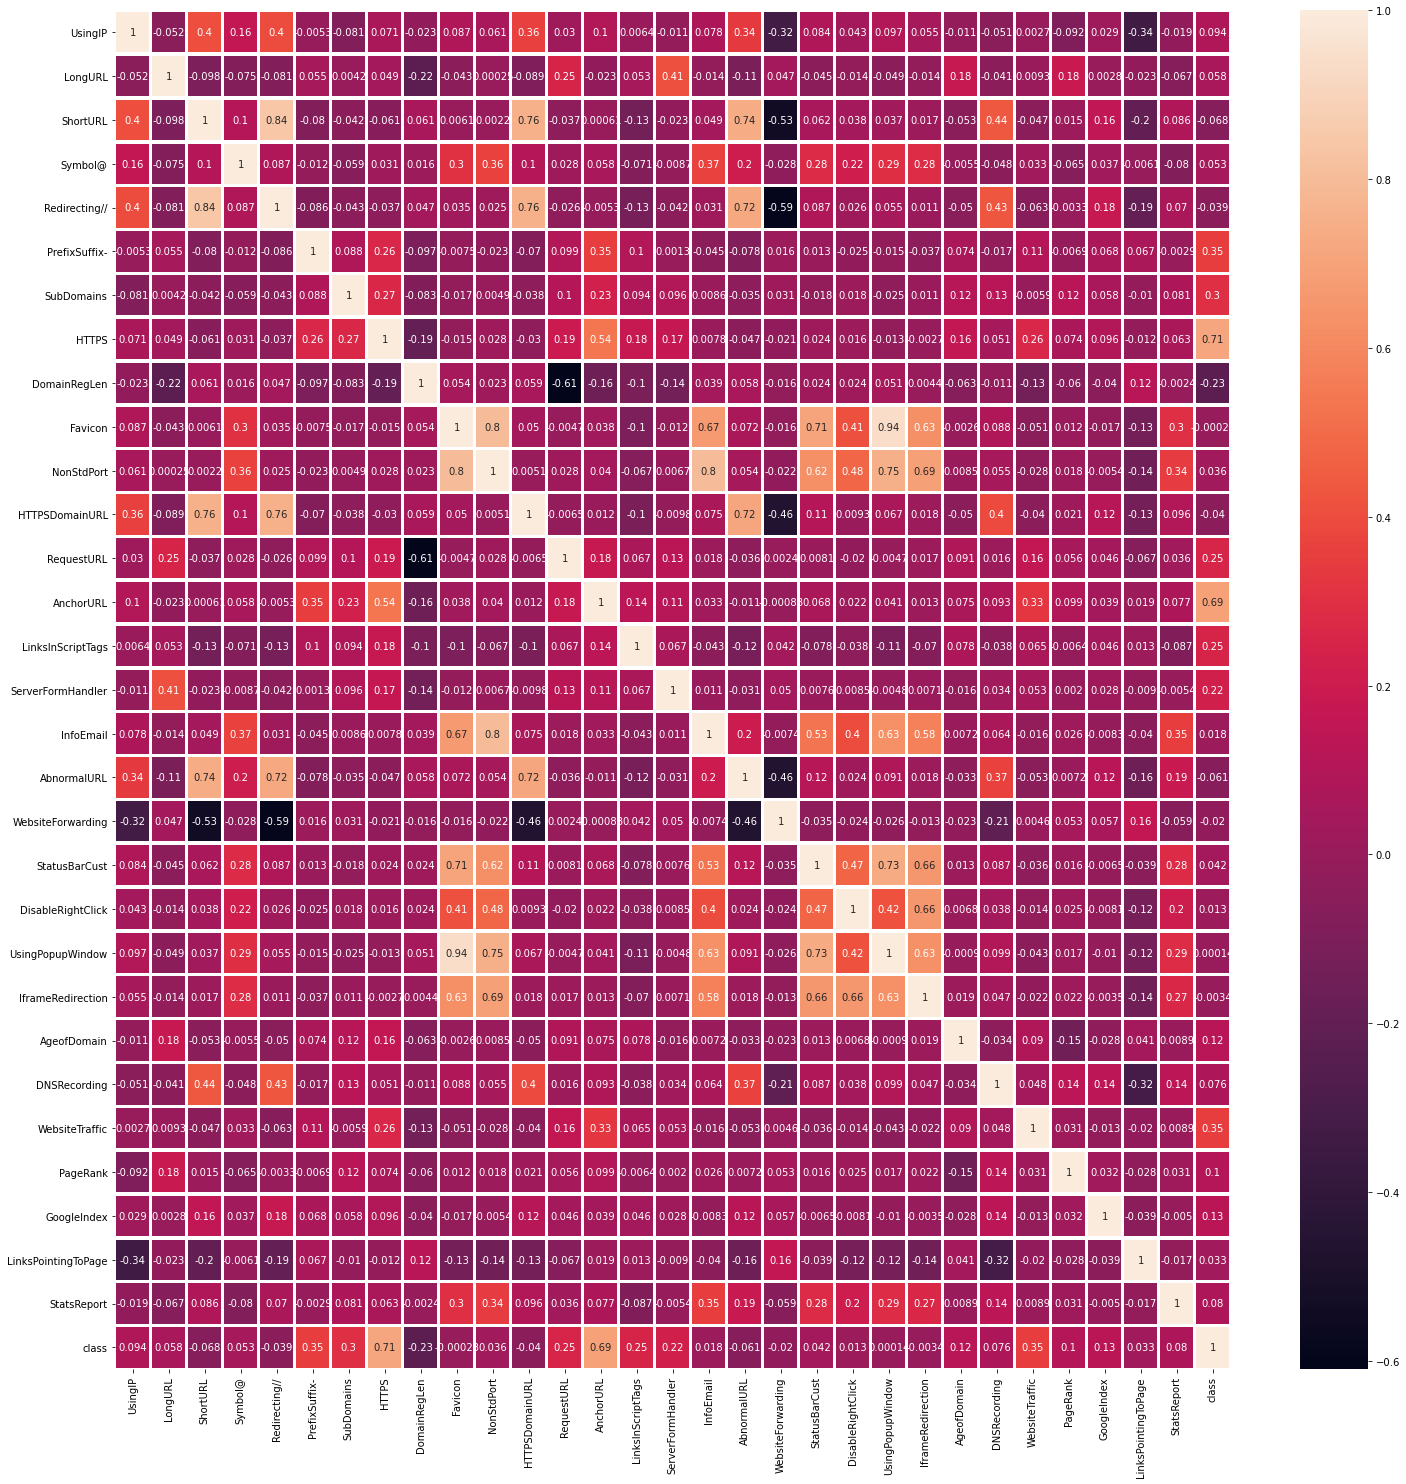

In [8]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, linewidth = 2.5)#, cmap='Blues')

In [9]:
features = df.drop(columns = {'class'})
targets = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

In [10]:
x_train

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
10168,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,0,-1,1,0,1
10167,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,...,1,-1,1,1,-1,0,-1,1,1,1
2115,1,-1,1,1,1,-1,0,0,-1,1,...,1,1,1,1,-1,-1,-1,1,1,1
1699,1,-1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,0,-1,1,1,1
1379,1,-1,1,1,1,-1,-1,1,-1,-1,...,1,-1,1,1,-1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,-1,1,-1,1,-1,0,0,-1,-1,...,-1,-1,-1,-1,1,1,1,1,1,1
5191,-1,1,1,1,1,1,0,1,-1,1,...,1,1,1,-1,1,1,1,1,0,1
5390,1,-1,1,-1,1,1,0,1,1,-1,...,1,-1,-1,-1,1,1,-1,1,1,1
860,1,-1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,-1,1,0,1


In [11]:
y_train

10168   -1
10167   -1
2115    -1
1699     1
1379     1
        ..
5734    -1
5191     1
5390     1
860      1
7270    -1
Name: class, Length: 7737, dtype: int64

In [12]:
x_test

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
10581,-1,-1,1,1,1,-1,-1,0,-1,1,...,1,1,1,1,1,0,-1,1,1,1
7533,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,1,0,-1,1,0,1
10987,-1,-1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,0,1
2992,-1,-1,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,-1,1,-1,1,1,1
8940,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,1,1,1,-1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,1,1,1,1,1,-1,-1,1,-1,-1,...,1,-1,1,1,-1,1,-1,1,1,1
5696,1,-1,1,1,1,-1,1,1,-1,-1,...,1,-1,-1,-1,1,1,1,1,1,1
1487,1,1,1,1,1,-1,0,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,1,1,-1
4584,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1


In [13]:
y_test

10581   -1
7533     1
10987    1
2992     1
8940     1
        ..
1557     1
5696     1
1487     1
4584    -1
180      1
Name: class, Length: 3317, dtype: int64

In [14]:
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=19)
dec_tree.fit(x_train, y_train)
y_predict = dec_tree.predict(x_test)
dec_tree_score = (dec_tree.score(x_test, y_test))*100

In [15]:
dec_tree_score

86.21705539754102

[0.01359379 0.01014376 0.00609316 0.00603735 0.00410994 0.04554459
 0.06061443 0.31245001 0.01849483 0.00472911 0.00305373 0.00698751
 0.02298955 0.24368475 0.03925057 0.02225439 0.00577122 0.00500666
 0.00622327 0.00417262 0.00168742 0.00581329 0.002836   0.01670766
 0.01315519 0.06785702 0.01324982 0.01308717 0.01901911 0.00538205]


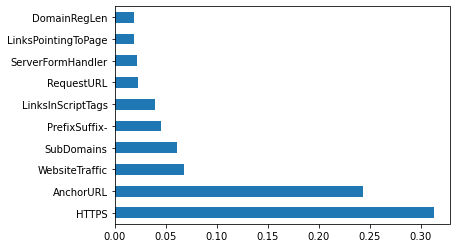

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features, targets)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
import joblib
joblib.dump(dec_tree, '/home/vikrant/D:/Project/Ml_deploy/phishing_decision.pkl')

['/home/vikrant/D:/Project/Ml_deploy/phishing_decision.pkl']

In [ ]:
cl_feature = list(df)
cl_feature.pop()
print(cl_feature)

In [ ]:
from sklearn import tree
import pydot
from six import StringIO
dot_data = StringIO() 
tree.export_graphviz(dec_tree, out_file=dot_data, feature_names=cl_feature, class_names = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [ ]:
cl_names = ['Phishing', 'Normal']

In [ ]:
graph[0].write_png('phishing_decision.png')

## Project Ends Here

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['HTTPS'])
plt.title('HTTPS of URL')

plt.subplot(1,2,2)
sns.regplot(df['HTTPS'], df['class'])
plt.title('HTTPS vs Class')

In [ ]:
df['AnchorURL']

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['AnchorURL'])
plt.title('Anchor URL')

plt.subplot(1,2,2)
sns.regplot(df['AnchorURL'], df['class'])
plt.title('Anchor URL vs Class')